In [13]:
import ssl
import urllib.request

# Create an unverified SSL context
ssl._create_default_https_context = ssl._create_unverified_context


import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # Correct attribute name
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [16]:
train_images.shape
type(train_images)

numpy.ndarray

In [17]:
train_images[0, 23, 23]

194

In [25]:
print(train_labels[:10])

[9 0 0 3 0 2 7 2 5 5]


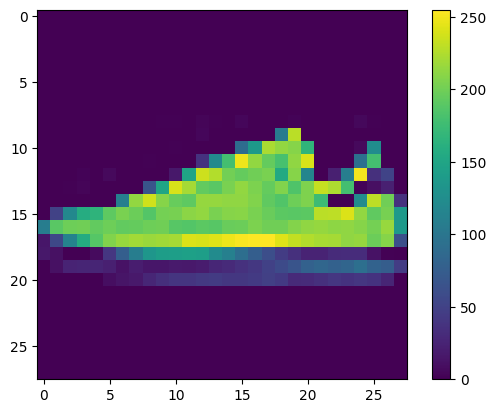

In [36]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images / 255.0

test_images = test_images / 255.0

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [42]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2305 - accuracy: 0.9135
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2220 - accuracy: 0.9166
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2179 - accuracy: 0.9188
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2093 - accuracy: 0.9212
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2044 - accuracy: 0.9229
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1975 - accuracy: 0.9255
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1948 - accuracy: 0.9272
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1888 - accuracy: 0.9290


In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Test accuracy: ", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8902
Test accuracy:  0.8902000188827515


313/313 [==============================] - 0s 1ms/step


313/313 [==============================] - 0s 1ms/step
Trouser


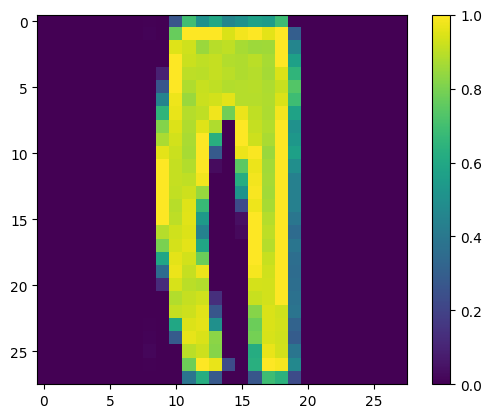

In [49]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()